=
### Problem 4: Maxwell A. Fine
### Problem 4A:
### We know that:

$$ \frac{I_{\nu}}{{\nu}^3} = Constant$$
is a Lorentz invariant (constant), where $I_{\nu}$ is the spefific intenstiy, and ${\nu}$ is frequency.

This means we can write the relationship between the emitted and observed spefific intenstiy as:
$$ \frac{I_{\nu}}{{\nu}^3} = \frac{I^{'}_{\nu}}{{\nu}^{'3}}$$
where the the primes denotes the observed quantities, IE the observed specific intenstiy.

Therefore:

$$I^{'}_{\nu} =  I_{\nu} (\frac{\nu^{'}}{\nu})^{3}.$$

We can of course relate $\nu^{'}$ to $\nu$ recalling that:

$$\nu^{'} = \nu \gamma (1-\frac{v}{c}\cos\theta).$$

Putting it all together we have:

$$I^{'}_{\nu} =  I_{\nu} (\frac{1}{\gamma (1-\frac{v}{c}\cos\theta)})^{3}.$$

In practical terms, recall that $I_{\nu}$ of the CMB is extremly close to $B_{\nu}(T)$ the Plank function.


$$I^{'}_{\nu} = \frac{h \nu^3}{c^3} \frac{1}{e^{\frac{h\nu}{kT}} - 1} (\frac{1}{\gamma (1-\frac{v}{c}\cos\theta)})^{3}.$$


### Problem 4B:
### We know that:

$$ \frac{I_{\nu}}{{\nu}^3} = Constant$$
is a Lorentz invariant (constant), where $I_{\nu}$ is the spefific intenstiy, and ${\nu}$ is frequency.

This means we can write the relationship between the emitted and observed spefific intenstiy as:
$$ \frac{I_{\nu}}{{\nu}^3} = \frac{I^{'}_{\nu}}{{\nu}^{'3}}$$
where the the prime denotes the observed specific intenstiy.

For the CMB, we can aproximate $I_{\nu}$ as $B_{\nu}(T)$ the Plank function. Writing it out we see:

$$\frac{\frac{h \nu^3}{c^3} \frac{1}{e^{\frac{h\nu}{kT}} - 1}}{\nu^{3}} = \frac{\frac{ h \nu^{'3}}{c^3} \frac{1}{e^{\frac{h\nu^{'}}{kT^{'}}} - 1}}{\nu^{'3}}$$

The $\nu$ cubed cancels, as do a lot of constants. Rewriting we have:

$$e^{\frac{h\nu}{kT}} = e^{\frac{h\nu^{'}}{kT^{'}}}$$
Clearly the exponets must be equal. This reduces to:

$$\frac{h\nu}{kT} = \frac{h\nu^{'}}{kT^{'}}.$$

$T^{'}$ is then solved as:
$$T^{'} =  T \frac{\nu^{'}}{\nu} $$

We can of course relate $\nu^{'}$ to $\nu$ recalling that:

$$\nu^{'} = \nu \gamma (1-\frac{v}{c}\cos\theta).$$

Putting it all together we have:
$$T^{'} =  T \gamma (1-\frac{v}{c}\cos\theta).$$

This implies that the deviation from $T$ is a factor of $\gamma (1-\frac{v}{c}\cos\theta).$ The max happens when $\theta = 0$, for a $v = 600$ Kms we get a $\beta = 3\times 10^{-3}$, and a $\gamma = \frac{1}{\sqrt(1-9\times 10^{-9})}$.
I get that $\frac{T^{'}}{T} \approx 1 - 10^{3}$. In other words a $.1$% difference.



=
### Problem 4C:
Write a code to calculate and plot the (rest frame) CMB Planck spectrum as a function of
frequency Bν(T), 
and verify your code by checking that the peak falls at the frequency you would
expect it to. Make sure use physical cgs units (i.e., frequency in Hz on the x-axis, Intensity units in
cgs on the y-axis) and label your axes properly! Add a few additional temperature curves in other
colors, and label the curves.



In [54]:
# imports 
import numpy as np
import matplotlib.pyplot as plt

# relevant constants in cgs
h = 6.626e-27  # Planck constant in erg·s
c = 3e10    # Speed of light in cm/s
k = 1.381e-23 * 1e+7 # Boltzmann constant in erg/K
alpha = 2.821439 # apart of weins law
T_cmb = 2.725 # kelvin (version given in Problem set)



In [55]:
# functions 

def planck_spectrum_frequency_rest(freq_rest, temperature_rest):
    """
    Calculate the Planck spectrum for a given rest frequency and temperature.

    Parameters:
    freq_rest (numpy array): Array of rest frequencies.
    temperature_rest (float): Temperature in Kelvin.

    Returns:
    numpy array: Array of corresponding spectral radiance values.
    """
    exponential_term = np.exp((h * freq_rest) / (k * temperature_rest))
    B = (h * freq_rest**3) / (c**3 * (exponential_term - 1))

    return B
    

def wiens_law_freq(temp):
    '''Returns the peak frequency for a black-body of temp (in kelvin)'''

    return (alpha*k*temp)/h




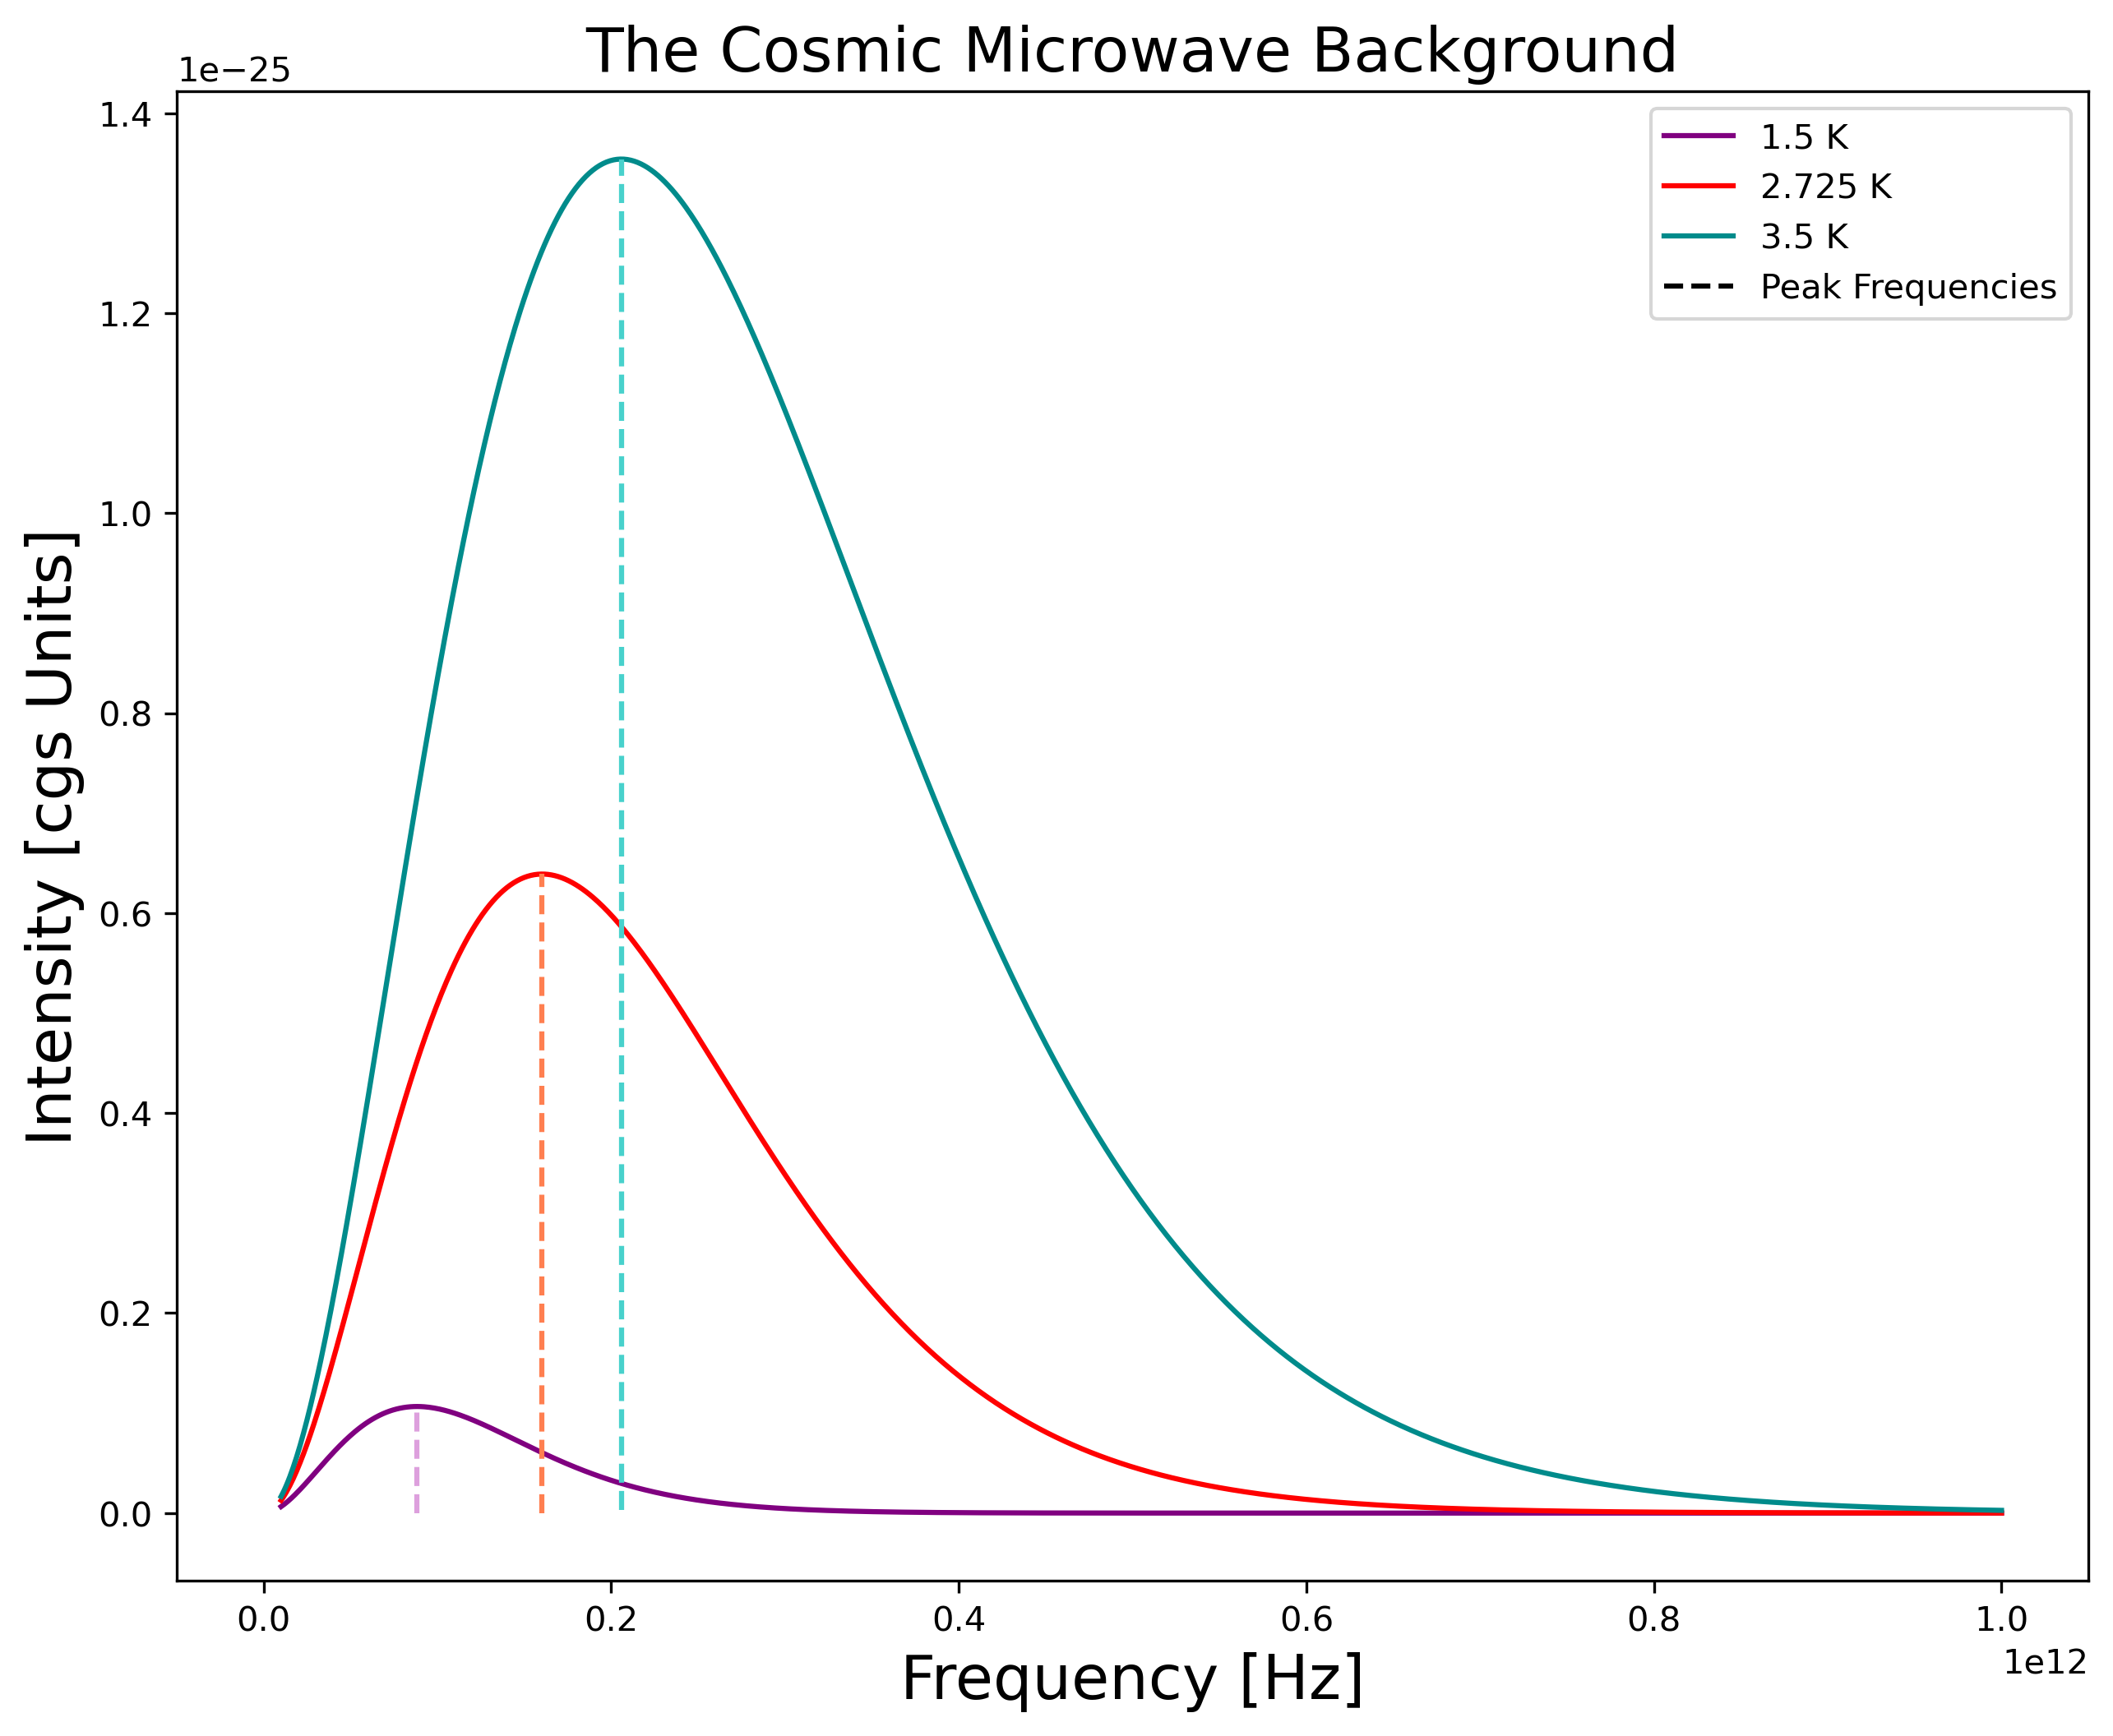

In [58]:
# Define a frequency range from 1 GHz to 1 PHz with 1000 data points for observation
freq_rest = np.linspace(1e10, 1e12, 1000)  # Example frequency range (1 GHz to 1 PHz) - modify as needed

# Select distinctive and non-conventional colors for plotting
colors = ['purple', 'red', 'DarkCyan']  # Non-traditional color choices for visualization
colours_wiens = ['plum', 'coral', 'MediumTurquoise']  # Associated Wiens' Law indicator colors

# Set temperatures for the Cosmic Microwave Background (CMB) and an observed value
temps_cmb = [1.5, T_cmb, 3.5]  

# Create a figure for plotting with specific dimensions and resolution
plt.figure(figsize=(10, 8), dpi=300)

# Iterate through different CMB temperatures and plot Planck spectra and Wiens' Law frequency lines
for i, t_cmb in enumerate(temps_cmb):
    # Calculate Planck spectra for the given temperature at each frequency
    B_obs = planck_spectrum_frequency_rest(freq_rest, t_cmb)
    
    # Plot the Planck spectra with distinct colors for each temperature
    plt.plot(freq_rest, B_obs, color=colors[i], label='{} K'.format(temps_cmb[i]))
    
    # Add dashed lines representing peak frequencies calculated by Wiens' Law
    plt.vlines(x=wiens_law_freq(temps_cmb[i]), ymin=np.min(B_obs), ymax=np.max(B_obs), 
               color=colours_wiens[i], ls='--')

# Plot an empty line for creating a legend entry illustrating the Peak Frequencies
plt.plot(np.empty([]), np.empty([]), ls='--', color='black', label='Peak Frequencies')

# Set title and axis labels for the CMB observation plot
plt.title('The Cosmic Microwave Background', fontsize=18)
plt.xlabel('Frequency [Hz]', fontsize=18)
plt.ylabel('Intensity [cgs Units]', fontsize=18)  # Unit description shortened for clarity

# Place the legend at the best location and save the plot as a PDF file
plt.legend(loc='best')
plt.savefig('cmb.pdf')
